In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data2.csv", delimiter=",")
df.head()

,Angle,Azimuth,H RCS (f = 180 MHz),H RCS (f = 350 MHz),V RCS (f=180 MHz),V RCS (f=350 MHz),missile
0,89.010147,0.0,2.051400,2.660000e-25,3.804121,9.190000e-25,agm86c
1,90.546584,0.5,1.734656,2.213781e-03,3.744950,4.226930e-04,agm86c
2,93.680049,1.0,1.272543,1.269226e-02,3.539431,5.275043e-03,agm86c
3,91.802465,1.5,1.544475,2.268877e-02,3.547722,6.401292e-03,agm86c
4,95.582702,2.0,0.975898,6.333399e-02,3.229333,3.343697e-02,agm86c


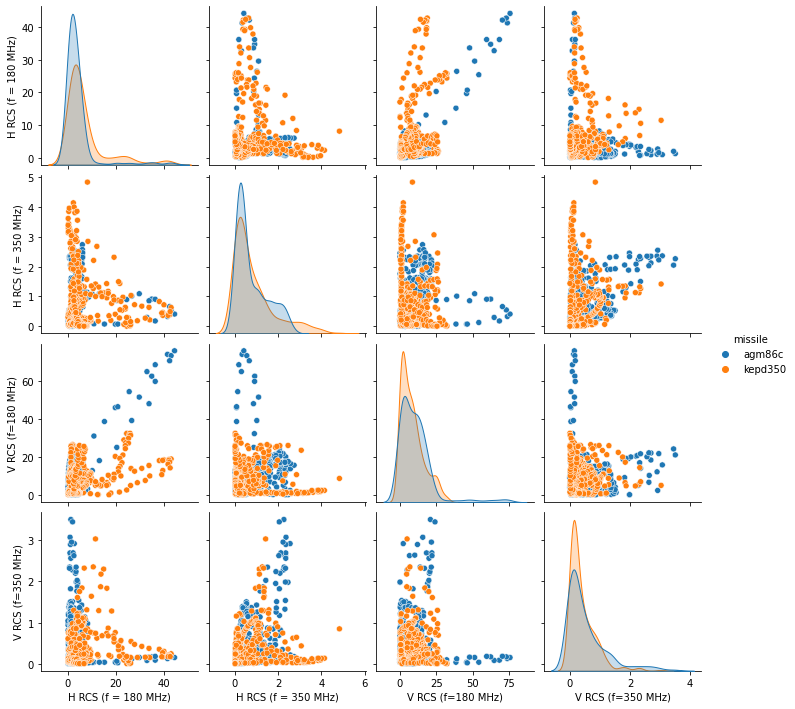

In [3]:
sns.pairplot(df, vars=['H RCS (f = 180 MHz)', 'H RCS (f = 350 MHz)', 'V RCS (f=180 MHz)', 'V RCS (f=350 MHz)'], hue="missile")

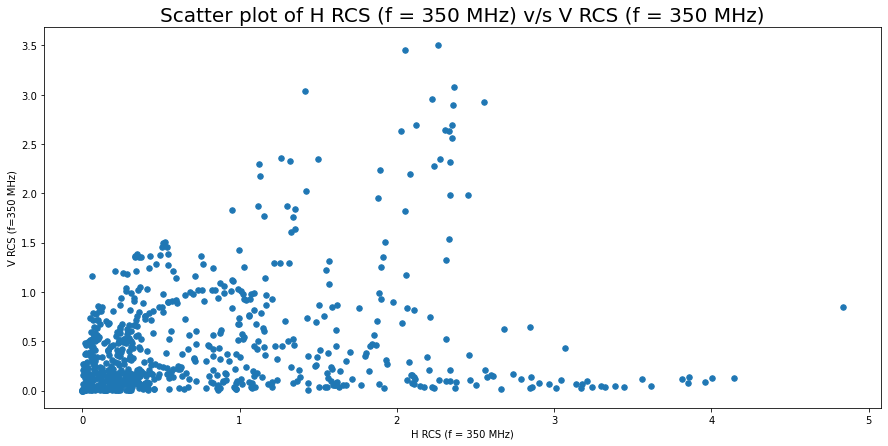

In [4]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of H RCS (f = 350 MHz) v/s V RCS (f = 350 MHz)', fontsize = 20)
plt.xlabel('H RCS (f = 350 MHz)')
plt.ylabel('V RCS (f=350 MHz)')
plt.scatter( x = 'H RCS (f = 350 MHz)', y = 'V RCS (f=350 MHz)', data = df, s = 30)
plt.show()

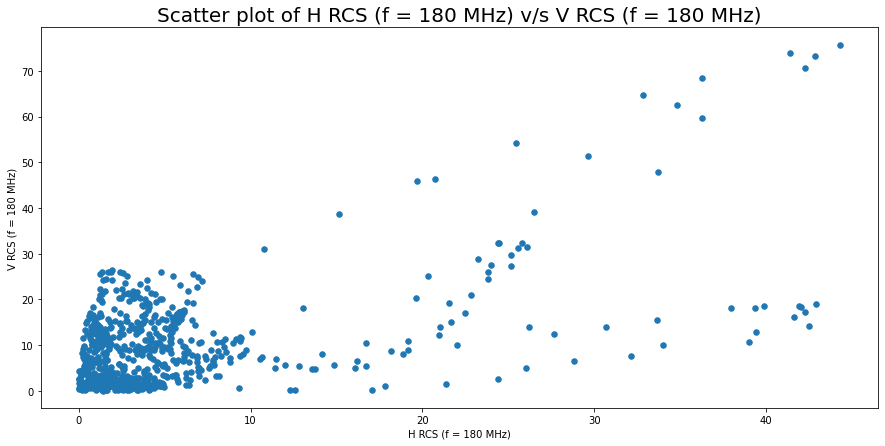

In [5]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of H RCS (f = 180 MHz) v/s V RCS (f = 180 MHz)', fontsize = 20)
plt.xlabel('H RCS (f = 180 MHz)')
plt.ylabel('V RCS (f = 180 MHz)')
plt.scatter( x = 'H RCS (f = 180 MHz)', y = 'V RCS (f=180 MHz)', data = df, s = 30)
plt.show()

In [6]:
X1 = df[['H RCS (f = 180 MHz)' , 'V RCS (f=180 MHz)']].iloc[: , :].values
inertia = []
for n in range(1, 8):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

In [7]:
X2 = df[['H RCS (f = 350 MHz)' , 'V RCS (f=350 MHz)']].iloc[: , :].values
inertia2 = []
for n in range(1, 8):
    algorithm2 = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm2.fit(X2)
    inertia2.append(algorithm2.inertia_)

In [9]:
algorithm = (KMeans(n_clusters = 7 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [10]:
algorithm2 = (KMeans(n_clusters = 7 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm2.fit(X2)
labels2 = algorithm2.labels_
centroids2 = algorithm2.cluster_centers_

In [12]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

In [13]:
h = 0.02
x_min2, x_max2 = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min2, y_max2 = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x_min2, x_max2, h), np.arange(y_min2, y_max2, h))
Z2 = algorithm2.predict(np.c_[xx2.ravel(), yy2.ravel()]) 

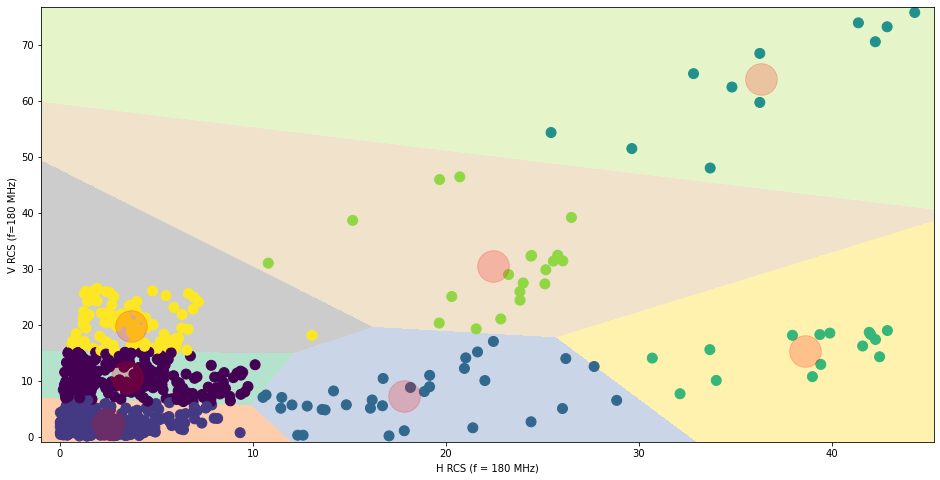

In [14]:
plt.figure(1 , figsize = (16 , 8) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'H RCS (f = 180 MHz)', y = 'V RCS (f=180 MHz)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 1000 , c = 'red' , alpha = 0.2)
plt.ylabel('V RCS (f=180 MHz)') , plt.xlabel('H RCS (f = 180 MHz)')
plt.show()

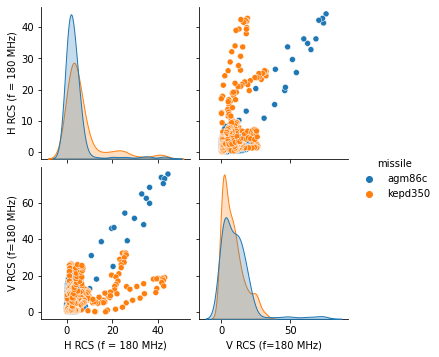

In [15]:
sns.pairplot(df, vars=['H RCS (f = 180 MHz)','V RCS (f=180 MHz)'], hue="missile")

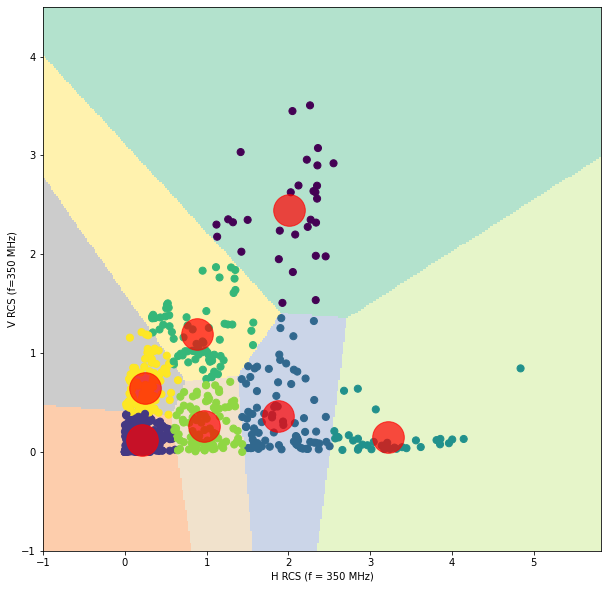

In [16]:
plt.figure(1 , figsize = (10 , 10) )
plt.clf()
Z2 = Z2.reshape(xx2.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx2.min(), xx2.max(), yy2.min(), yy2.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(x = 'H RCS (f = 350 MHz)', y = 'V RCS (f=350 MHz)', data = df, c = labels2, s = 50)
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 1000 , c = 'red' , alpha = 0.7)
plt.ylabel('V RCS (f=350 MHz)') , plt.xlabel('H RCS (f = 350 MHz)')
plt.show()

In [17]:
X3 = df[['H RCS (f = 350 MHz)' , 'V RCS (f=350 MHz)' ,'Angle']].iloc[: , :].values
inertia = []
for n in range(1 , 8):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 111, algorithm='elkan'))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

In [18]:
algorithm = (KMeans(n_clusters = 7 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.fit_predict(X3)
df['cluster'] = pd.DataFrame(y_kmeans)
df.head()

,Angle,Azimuth,H RCS (f = 180 MHz),H RCS (f = 350 MHz),V RCS (f=180 MHz),V RCS (f=350 MHz),missile,cluster
0,89.010147,0.0,2.051400,2.660000e-25,3.804121,9.190000e-25,agm86c,6
1,90.546584,0.5,1.734656,2.213781e-03,3.744950,4.226930e-04,agm86c,6
2,93.680049,1.0,1.272543,1.269226e-02,3.539431,5.275043e-03,agm86c,4
3,91.802465,1.5,1.544475,2.268877e-02,3.547722,6.401292e-03,agm86c,1
4,95.582702,2.0,0.975898,6.333399e-02,3.229333,3.343697e-02,agm86c,2


In [19]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df['H RCS (f = 350 MHz)'],
    y= df['V RCS (f=350 MHz)'],
    z= df['Angle'],
    mode='markers',
     marker=dict(
        color = df['cluster'], 
        size= 4,
        line=dict(
            color= df['cluster'],
            width= 1
        ),
        opacity=1
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Cluster',
    scene = dict(
            xaxis = dict(title  = 'H RCS (f = 350 MHz)'),
            yaxis = dict(title  = 'V RCS (f=350 MHz)'),
            zaxis = dict(title  = 'Angle')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [20]:
X4 = df[['H RCS (f = 180 MHz)' , 'V RCS (f=180 MHz)' ,'Angle']].iloc[: , :].values
inertia = []
for n in range(1 , 8):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 111, algorithm='elkan'))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

In [21]:
algorithm = (KMeans(n_clusters = 7 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X4)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.fit_predict(X4)
df['cluster'] = pd.DataFrame(y_kmeans)
df.head()

,Angle,Azimuth,H RCS (f = 180 MHz),H RCS (f = 350 MHz),V RCS (f=180 MHz),V RCS (f=350 MHz),missile,cluster
0,89.010147,0.0,2.051400,2.660000e-25,3.804121,9.190000e-25,agm86c,1
1,90.546584,0.5,1.734656,2.213781e-03,3.744950,4.226930e-04,agm86c,1
2,93.680049,1.0,1.272543,1.269226e-02,3.539431,5.275043e-03,agm86c,1
3,91.802465,1.5,1.544475,2.268877e-02,3.547722,6.401292e-03,agm86c,1
4,95.582702,2.0,0.975898,6.333399e-02,3.229333,3.343697e-02,agm86c,1


In [22]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df['H RCS (f = 180 MHz)'],
    y= df['V RCS (f=180 MHz)'],
    z= df['Angle'],
    mode='markers',
     marker=dict(
        color = df['cluster'], 
        size= 2,
        line=dict(
            color= df['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Cluster',
    scene = dict(
            xaxis = dict(title  = 'H RCS (f = 180 MHz)e'),
            yaxis = dict(title  = 'V RCS (f=180 MHz)'),
            zaxis = dict(title  = 'Angle')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)